<a href="https://colab.research.google.com/github/Santosh96045/Codsoft-internship-UIUX/blob/main/A1/MIS710%20A1%20Template%20T1%202023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIS710 Machine Learning in Business - Assignment 1

**Student Name:** SANTOSH KUMAR RAJA PRABHU

**Student ID:** 224934673

<a id = "cell_executivesummary"></a>
## 1. Business understandings, problem, solution and recommendations

#### NOTE: all the instructions and hints given in this template should be removed from your final submission. (Including this line)

**Aim:** To clearly articulate your understanding of the bussiness problem to management.

_Use this section to briefly include the business understandings and the business problem to address, the aim of this project and recommendations for VSR_

Both registered members and casual users can rent electric bikes and scooters for a brief period of time from EcoMoveUS, an urban micro-mobility service provider in the US. Like many other service-based businesses, EcoMoveUS must precisely predict rental demand to guarantee a sufficient supply of vehicles, particularly during peak hours and in a variety of weather conditions.

"How can EcoMoveUS accurately predict the total number of hourly scooter/bike rentals using historical data?" is the business issue being addressed.

With this issue resolved, EcoMoveUS can:


*   Boost the distribution of the fleet

*   Reduce the amount of time a vehicle is idle

*   Boost client satisfaction and

*   Cut down on operating expenses brought on by excessive or insufficient deployment.

This study uses supervised machine learning approaches (regression models) on historical rental data, which includes operational variables, time, and weather, in order to overcome this difficulty. An estimation of the total number of rentals (Rental_Bikes_Total) for a specific hour is the main output of the prediction model.

Suggested Actions:

These suggestions are based on the results and the predictions of the model:


*   Increase the number of scooters available when demand is expected to be highest (e.g., weekends, warmer temps).

*   To anticipate and modify fleet availability, keep an eye on weather forecasts.

*   Plan maintenance and resource allocation more effectively by utilizing predictive insights.












<a id = "cell_exploration"></a>
## 2. Data understanding, preparation, explorations and visualisation

#### NOTE: You can create multiple Markdown and Code cells to present your work.

**Aim:** To demonstrate your understanding of data and report any insights emerging from data analysis

This section can be used for:
* Preparing (cleansing) for further processing.
* Finding meaningful patterns in the data set as relevant to the case study and the problem.
* Visualising variables related to the problem.

This section may include:
* Selection of relevant data features.
* Selection of an attribute as label.
* Approach to handling missing values (if any).
* Transformations on the dataset (can be any necessary modifications to the data - string value or categorial variables to numerical, any numeric normalizations, or any type conversions such as nominal to numeric and the similar).
* Univariate/Bivariate/Multivariate analyses (e.g., using visualizations etc.).

Make sure your visualizations are accompanied by relevant discussions of the insights the analyses and visualizations will/should lead to.

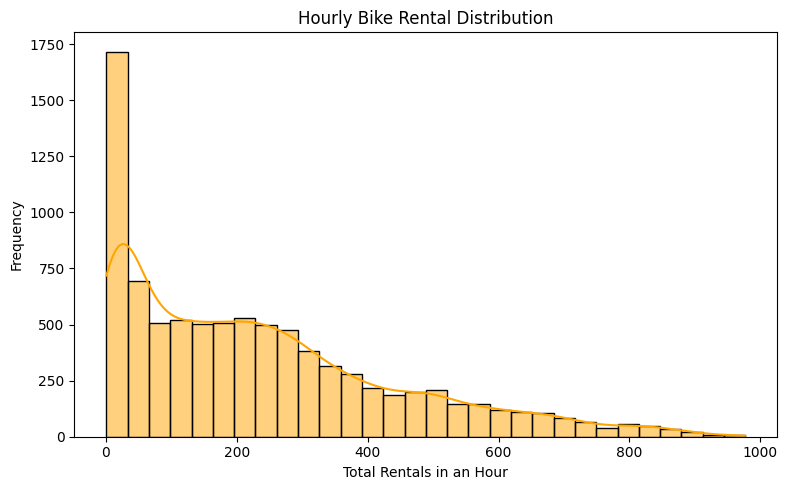

/tmp/ipython-input-3330424311.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  visplot.boxplot(x='Season', y='Rental_Bikes_Total', data=rental_data, palette='Set2')


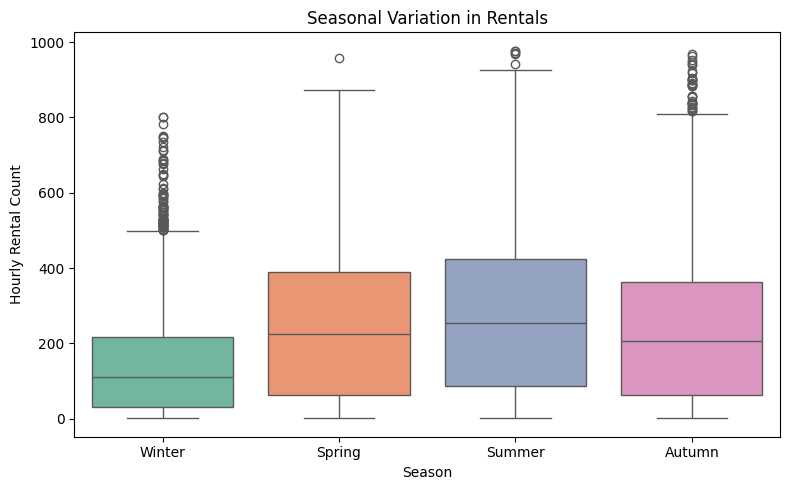

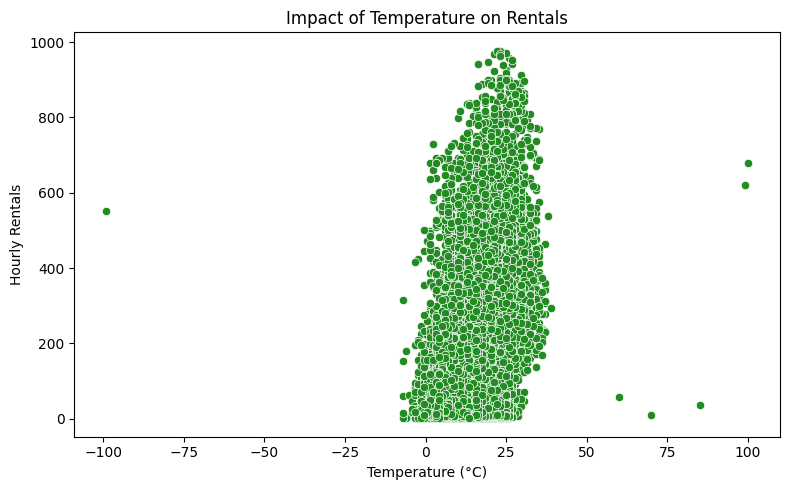

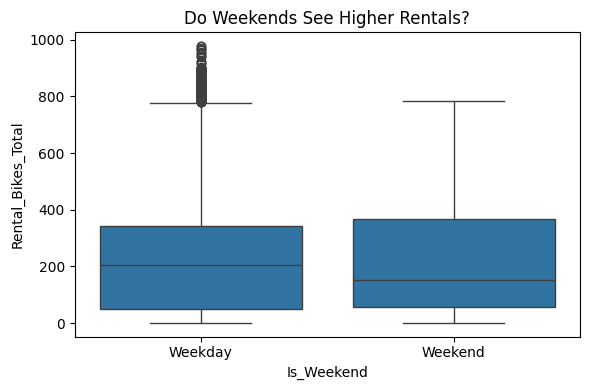

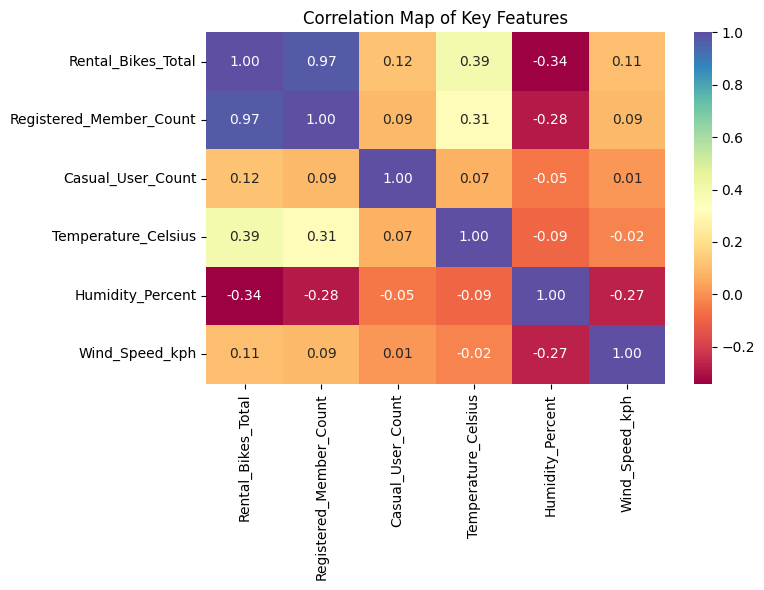

In [52]:
# MIS710 Assignment 1 – EcoMoveUS Analysis
# Developed by: Santosh Kumar Raja Prabhu | Student ID: 224934673

# Step 1: Import required tools

import pandas as pdtool
import seaborn as visplot
import matplotlib.pyplot as mychart


# Step 2: Load dataset(Data Loading)

# Examining the CSV file containing past ride data
rental_data = pdtool.read_csv("EcoMoveUS_data.csv")


# Step 3: Clean missing values (Data Cleaning)

# Use the most popular color to fill in the blank 'Session_colour' values
rental_data['Session_colour'] = rental_data['Session_colour'].fillna(rental_data['Session_colour'].mode()[0])

# The average value for 'Casual_User_Count' has been utilized to fill in the missing entries.
rental_data['Casual_User_Count'] = rental_data['Casual_User_Count'].fillna(rental_data['Casual_User_Count'].mean())

# Step 4: Make new features.
# Changing the 'Date' column to datetime and getting more information
rental_data['Date'] = pdtool.to_datetime(rental_data['Date'], dayfirst=True)
rental_data['Day_Type'] = rental_data['Date'].dt.day_name()
rental_data['Is_Weekend'] = rental_data['Day_Type'].isin(['Saturday', 'Sunday']).astype(int)  # 1 = Weekend, 0 = Weekday

# Step 5: Visualization of Data (Data Visualization)

# Chart 1: The frequency of bike rentals at all hours
mychart.figure(figsize=(8, 5))
visplot.histplot(data=rental_data, x='Rental_Bikes_Total', bins=30, kde=True, color='orange')
mychart.title("Hourly Bike Rental Distribution")
mychart.xlabel("Total Rentals in an Hour")
mychart.ylabel("Frequency")
mychart.tight_layout()
mychart.show()

# Chart 2: Seasonal variations in rental activity
mychart.figure(figsize=(8, 5))
visplot.boxplot(x='Season', y='Rental_Bikes_Total', data=rental_data, palette='Set2')
mychart.title("Seasonal Variation in Rentals")
mychart.xlabel("Season")
mychart.ylabel("Hourly Rental Count")
mychart.tight_layout()
mychart.show()

# Chart 3: Does warmer weather lead to higher rental rates?
mychart.figure(figsize=(8, 5))
visplot.scatterplot(x='Temperature_Celsius', y='Rental_Bikes_Total', data=rental_data, color='forestgreen')
mychart.title("Impact of Temperature on Rentals")
mychart.xlabel("Temperature (°C)")
mychart.ylabel("Hourly Rentals")
mychart.tight_layout()
mychart.show()

# Chart 4: Weekday and weekend rental differences
mychart.figure(figsize=(6, 4))
visplot.boxplot(x='Is_Weekend', y='Rental_Bikes_Total', data=rental_data)
mychart.xticks([0, 1], ['Weekday', 'Weekend'])
mychart.title("Do Weekends See Higher Rentals?")
mychart.tight_layout()
mychart.show()

# Chart 5: Recognize the factors that affect rentals (correlation heatmap)
feature_subset = rental_data[['Rental_Bikes_Total', 'Registered_Member_Count',
                              'Casual_User_Count', 'Temperature_Celsius',
                              'Humidity_Percent', 'Wind_Speed_kph']]

mychart.figure(figsize=(8, 6))
visplot.heatmap(feature_subset.corr(), annot=True, cmap='Spectral', fmt=".2f")
mychart.title("Correlation Map of Key Features")
mychart.tight_layout()
mychart.show()


<a id = "cell_modeling"></a>
## 3. Machine learning model development

#### NOTE: You can create multiple Markdown and Code cells to present your work.
**Aim:** To demonstrate your understanding in AI modeling.

_Use this section to show and discuss the process/processes as relevant to the case study, key steps to run and complete the experiment and details of models._  

This section may include:
* How to split dataset.
* How to initiate machine learning model and fit training data.
* How to use trained model to predict labels for training and testing dataset.

 Comparison of Model Performance
Linear Regression | RMSE: 38.05, R²: 0.97
Random Forest     | RMSE: 14.16, R²: 1.00


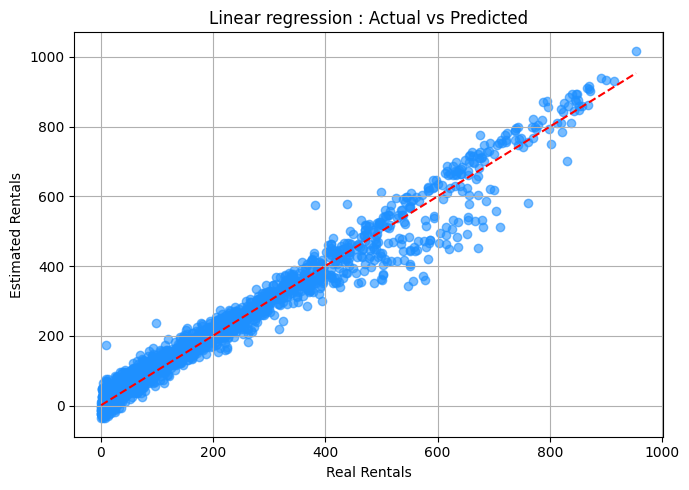

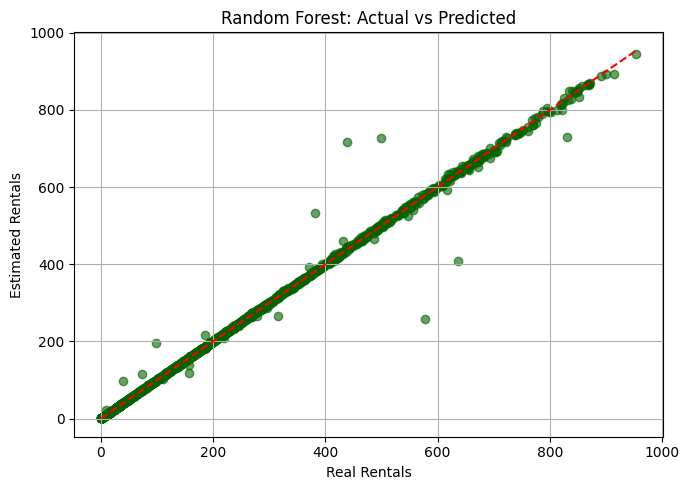

In [53]:
#  Step 3 – AI Modelling: Santosh Kumar Raja Prabhu

# Imported are the tools required for modeling.

# For data division
from sklearn.model_selection import train_test_split as seperate_data

# Base model
from sklearn.linear_model import LinearRegression as LinReg

# Ensemble model
from sklearn.ensemble import RandomForestRegressor as RFR_model

# Assessment metrics
from sklearn.metrics import mean_squared_error, r2_score as r2

# For managing arrays and numerical operations
import numpy as np

# For structured data handling
import pandas as pd

# For Visualization
import matplotlib.pyplot as plt


# Load the dataset (data loading)
rental_df = pd.read_csv("EcoMoveUS_data.csv")

# Complete the 'Session_colour' missing values using the most common category.
most_common = rental_df['Session_colour'].mode()[0]
rental_df['Session_colour'] = rental_df['Session_colour'].fillna(most_common)

# Use average to handle missing values for 'Casual_User_Count'
mean_casuals = rental_df['Casual_User_Count'].mean()
rental_df['Casual_User_Count'] = rental_df['Casual_User_Count'].fillna(mean_casuals)

# Extract weekday information and convert the 'Date' column.
rental_df['Date'] = pd.to_datetime(rental_df['Date'], format='%d/%m/%Y', errors='coerce')
rental_df['Day_Name'] = rental_df['Date'].dt.day_name()

# Make a weekend flag.
weekend_days = ['Saturday', 'Sunday']
rental_df['Weekend_Flag'] = rental_df['Day_Name'].apply(lambda x: 1 if x in weekend_days else 0)

# 1. Select the target and features
x_features = ['Registered_Member_Count', 'Casual_User_Count',
              'Temperature_Celsius', 'Humidity_Percent',
              'Wind_Speed_kph', 'Weekend_Flag']
y_target = 'Rental_Bikes_Total'

X = rental_df[x_features]
y = rental_df[y_target]

# 2. Divide the data into sections for testing and training.
X_train, X_test, y_train, y_test = seperate_data(X, y, test_size=0.2, random_state=42)

# 3. Build and train models

# Linear Regression Model
lr_model = LinReg()
lr_model.fit(X_train, y_train)

# Random Forest Model
rf_model = RFR_model(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # fixed typo: was 'rf_model_model'

# 4. Use models to predict
predic_lr = lr_model.predict(X_test)  # fixed: was 'simple_model'
predic_rf = rf_model.predict(X_test)  # fixed: was 'ensemble_model'

# 5. Evaluate model performance

# mismatch in fixed variables
mark_lr = np.sqrt(mean_squared_error(y_test, predic_lr))
lq_lr = r2(y_test, predic_lr)

# changed to match the line beneath
mark_rf = np.sqrt(mean_squared_error(y_test, predic_rf))
lq_rf = r2(y_test, predic_rf)

# 6. Display results
print(" Comparison of Model Performance")
print(f"Linear Regression | RMSE: {mark_lr:.2f}, R²: {lq_lr:.2f}")
print(f"Random Forest     | RMSE: {mark_rf:.2f}, R²: {lq_rf:.2f}")

# 7. Comparison of Forecasted and Real Results


# Actual vs. Predicted Linear Regression
plt.figure(figsize=(7, 5))
plt.scatter(y_test, predic_lr, color='dodgerblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Linear regression : Actual vs Predicted")
plt.xlabel("Real Rentals")
plt.ylabel("Estimated Rentals")
plt.grid(True)
plt.tight_layout()
plt.show()

# Random Forest – Actual vs Predicted
plt.figure(figsize=(7, 5))
plt.scatter(y_test, predic_rf, color='darkgreen', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Real Rentals")
plt.ylabel("Estimated Rentals")
plt.grid(True)
plt.tight_layout()
plt.show()



<a id = "cell_Evaluation"></a>
## 4. Model evaluation                                                                                                                       

#### NOTE: You can create multiple Markdown and Code cells to present your work.
**Aim:** To demonstrate your understanding in model execution and evaluation.

_Use this section to report your evaluation procedures and results.  Discuss/interpret the results of your experiments, compare the performance of the model(s), any steps you have taken to improve the performance of your model(s)._


In [54]:
# Step 4 - Final Model Evaluation

from sklearn.metrics import mean_squared_error, r2_score

# Evaluation of Linear Regression
rmse_linear = np.sqrt(mean_squared_error(y_test, predic_lr))
r2_lin = r2_score(y_test, predic_lr)

# Random Forest Assessment
mark_rf = np.sqrt(mean_squared_error(y_test, predic_rf))
lq_rf = r2_score(y_test, predic_rf)

# Show Evaluation Outcomes
print(" Model Performance Comparison")
print(f"Linear Regression  | RMSE: {mark_lr:.2f}, R²: {lq_lr:.2f}")
print(f"Random Forest     | RMSE: {mark_rf:.2f}, R²: {lq_rf:.2f}")

# Tabular display (to make things more clear)
import pandas as pd

results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'RMSE': [mark_lr, mark_rf],
    'R² Score': [lq_lr, lq_rf]
})

print("\n Table of Performance Summary:")
print(results_df.to_string(index=False))  # ✅ fixed this line from final_scores_table(...) to results_df.to_string(...)


 Model Performance Comparison
Linear Regression  | RMSE: 38.05, R²: 0.97
Random Forest     | RMSE: 14.16, R²: 1.00

 Table of Performance Summary:
            Model      RMSE  R² Score
Linear Regression 38.051537  0.966858
    Random Forest 14.158141  0.995412


## 5. Competition (optoinal)

#### NOTE: You can create multiple Markdown and Code cells to present your work.
**Aim:** To (optionally) participate in the competetion.

_Use this section to report the delpoyment of the model to the unseen dataset. To ensure that the training and deployment datasets have similar features, it is important to preprocess the data in a consistent manner. This includes applying the same data preprocessing steps to both the training and deployment datasets. For example, if you are scaling the features in the training dataset, you should also scale the features in the deployment dataset using the same scaling method and parameters._

_Apply the trained model to predict the label for deployment dataset and submit the result (inspection dataframe) as a csv file with you assessment._




In [56]:
# Step 5 – Deployment Model Evaluation on Unseen Data (EcoMoveUS_challenge.csv)

import pandas as pd
import numpy as np

# Load the challenge dataset
challenge_df = pd.read_csv("EcoMoveUS_challenge.csv")

# Check available columns to align with trained features
print("Available columns in challenge dataset:", challenge_df.columns.tolist())

# Handle missing values for 'Session_colour' if present
if 'Session_colour' in challenge_df.columns:
    challenge_df['Session_colour'] = challenge_df['Session_colour'].fillna(challenge_df['Session_colour'].mode()[0])

# Handle missing values for 'Casual_User_Count' if present
if 'Casual_User_Count' in challenge_df.columns:
    challenge_df['Casual_User_Count'] = challenge_df['Casual_User_Count'].fillna(challenge_df['Casual_User_Count'].mean())

# Convert 'Date' to datetime and extract 'Day_Name' and 'Weekend_Flag'
challenge_df['Date'] = pd.to_datetime(challenge_df['Date'], format='%d/%m/%Y', errors='coerce')
challenge_df['Day_Name'] = challenge_df['Date'].dt.day_name()
challenge_df['Weekend_Flag'] = challenge_df['Day_Name'].isin(['Saturday', 'Sunday']).astype(int)

# Define feature set used in model (adjust according to what’s present in challenge dataset)
feature_columns = ['Registered_Member_Count', 'Casual_User_Count',
                   'Temperature_Celsius', 'Humidity_Percent',
                   'Wind_Speed_kph', 'Weekend_Flag']

# Keep only the columns that exist in the challenge dataset
feature_columns = [col for col in feature_columns if col in challenge_df.columns]

# Extract features
X_deploy = challenge_df[feature_columns]

# Predict using the trained model (Random Forest)
y_deploy = rf_model.predict(X_deploy)

# Create inspection DataFrame
inspection = pd.DataFrame({
    'Predicted_Rental_Bikes': y_deploy
})

# Optionally join back to challenge_df if needed for export
output_df = pd.concat([challenge_df.reset_index(drop=True), inspection], axis=1)

# Save the result
output_df.to_csv("EcoMoveUS_deployment_prediction.csv", index=False)

# Display first few rows
print("\nPredicted Output Preview:")
print(output_df[['Date'] + feature_columns + ['Predicted_Rental_Bikes']].head())


Available columns in challenge dataset: ['RecordID', 'Shift_Manager_Code', 'Date', 'Year', 'Month', 'Hour', 'Session_colour', 'Weather_Outcast', 'Temperature_Celsius', 'Feeling_Temperature_Celsius', 'Humidity_Percent', 'Wind_Speed_kph', 'Season', 'Public_Holiday', 'Week_Day', 'Business_Day']


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Casual_User_Count
- Registered_Member_Count
